# Predicting Stock Price of multiple oil & gas companies


First let's import the libraries and download the data needed.First let's import the libraries and download the data needed.

In [30]:
import pandas as pd
import datetime
import pandas_datareader.data as web

start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2017, 1, 11)

df = web.DataReader('DVN','yahoo',start=start,end=end)

Calculation of High Low Percentage and Percentage Change


In [31]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

#Pre-processing & Cross Validation
Drop missing value

In [33]:
from sklearn import preprocessing
import numpy as np
import math

dfreg.fillna(value=-99999, inplace=True)

We want to separate 1 percent of the data to forecast

In [34]:
forecast_out = int(math.ceil(0.01 * len(dfreg)))

Separating the label here, we want to predict the AdjClose

In [35]:
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

Scale the X so that everyone can have the same distribution for linear regression

In [36]:
X = preprocessing.scale(X)

Finally We want to find Data Series of late X and early X (train) for model generation and evaluation

In [37]:
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

Separate label and identify it as y

In [38]:
y = np.array(dfreg['label'])
y = y[:-forecast_out]

Model Generation
- We will plug and play the existing Scikit-Learn library and train the model by selecting our X and y train sets. The code will be as following.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X,y) # x_train, y_train

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X,y)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X,y)

# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X,y)

KNeighborsRegressor(n_neighbors=2)

EVALUATION

In [43]:
confidencereg = clfreg.score(X,y) #x_test, y_test
print('confidencereg = ', confidencereg)
confidencepoly2 = clfpoly2.score(X,y)
print('confidencepoly2 = ', confidencepoly2)
confidencepoly3 = clfpoly3.score(X,y)
print('confidencepoly3 = ', confidencepoly3)
confidenceknn = clfknn.score(X,y)
print('confidenceknn = ', confidenceknn)

confidencereg =  0.8723307681344952
confidencepoly2 =  0.8750857394943301
confidencepoly3 =  0.8777296206424957
confidenceknn =  0.9440322364036313


Print some of the stocks forecast

In [41]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan

Plotting the prediction

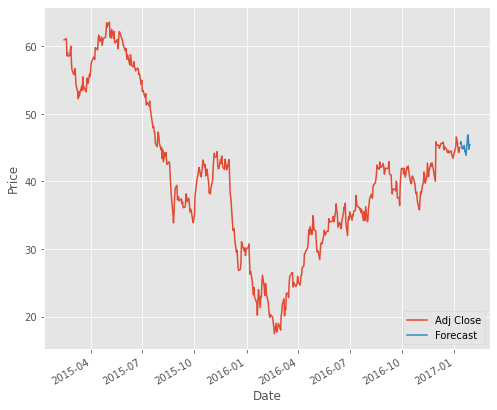

In [42]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in
range(len(dfreg.columns)-1)]+[i]

dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
mpl.rc('figure', figsize=(8,7))
mpl.__version__

#adjusting the style of matplotlib
style.use('ggplot')

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()